In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline

In [2]:
#数据加载
df=pd.read_excel(r"C:\Users\yaoyao tang\Desktop\ML-hydrothermal\experiment_dataset.xlsx")
df.columns = ['M1','M2','C','V', 'T', 'H', 'Ex', 'Em1','Em2','QY']

In [3]:
df.head()

,M1,M2,C,V,T,H,Ex,Em1,Em2,QY
0,0.6,0.4,2,15,200,10,562,624,676,15.5
1,0.8,0.8,4,15,140,12,562,630,678,15.0
2,1.0,1.0,2,15,140,10,562,626,678,19.3
3,0.8,0.8,2,10,180,4,562,624,678,14.6
4,1.0,1.0,6,15,160,12,562,630,678,14.5


In [4]:
x=np.array(df.loc[:,"M1":"H"])
y=np.array(df.loc[:,"QY"])

In [5]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
def test(y_pred,y_true):
    r2=r2_score(y_true,y_pred)
    rmse=sqrt(mean_squared_error(y_pred,y_true))
    mae=mean_absolute_error(y_pred,y_true)
    return np.array([r2,rmse,mae])

In [5]:
from xgboost.sklearn import XGBRegressor #XGB
cv_params = {'n_estimators': [10,20,30,40,50,60,70,80,90,100,110]}

other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))
print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
参数的最佳取值：{'n_estimators': 40}
最佳模型得分:0.6266832208222005
[0.94819789 1.36092103 1.0305451 ]


In [6]:
cv_params = { 'max_depth': [1,2,3, 4,5,6,7,8,9], 'min_child_weight': [1, 2, 3, 4,5,6,7,8,9]}

other_params = {'learning_rate': 0.1, 'n_estimators':40, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))

print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
参数的最佳取值：{'max_depth': 3, 'min_child_weight': 5}
最佳模型得分:0.6599786430433517
[0.8761173  2.10457563 1.56506747]


In [7]:
cv_params = { 'gamma': [0.0001,0.001,0.01,0.05,0.08,0.1,0.15, 0.2, 0.3]}

other_params = {'learning_rate': 0.1, 'n_estimators': 40, 'max_depth': 3, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))

print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
参数的最佳取值：{'gamma': 0.2}
最佳模型得分:0.6601520477368034
[0.87841878 2.08493467 1.56470637]


In [8]:
cv_params = { 'subsample': [0.4,0.5,0.6,0.7,0.8,0.9,1], 
             'colsample_bytree': [0.4,0.5,0.6,0.7,0.8,0.9,1]}

other_params = {'learning_rate': 0.1, 'n_estimators': 40, 'max_depth': 3, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.2, 'reg_alpha': 0, 'reg_lambda': 1}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))

print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
参数的最佳取值：{'colsample_bytree': 1, 'subsample': 0.6}
最佳模型得分:0.6874341710151395
[0.87988586 2.07231744 1.55009563]


In [9]:
cv_params = { 'reg_alpha': [0.05,0.01, 0.1, 1], 'reg_lambda': [0.05,0.01, 0.1, 1,5,10]}

other_params = {'learning_rate': 0.1, 'n_estimators': 40, 'max_depth': 3, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 1, 'gamma': 0.2, 'reg_alpha': 0, 'reg_lambda': 1}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))

print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
参数的最佳取值：{'reg_alpha': 0.1, 'reg_lambda': 5}
最佳模型得分:0.7031157158749469
[0.85672792 2.26328887 1.68314895]


In [10]:
cv_params = {  'learning_rate': [0.001, 0.01, 0.05, 0.07, 0.1,0.3,0.5,1]}

other_params = {'learning_rate': 0.1, 'n_estimators': 40, 'max_depth': 3, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 1, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 5}

model = XGBRegressor(**other_params)
xgb_cv = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
xgb_cv.fit(x, y)
print('参数的最佳取值：{0}'.format(xgb_cv.best_params_))
print('最佳模型得分:{0}'.format(xgb_cv.best_score_))

print(test(xgb_cv.predict(x),y))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
参数的最佳取值：{'learning_rate': 0.1}
最佳模型得分:0.7031157158749469
[0.85672792 2.26328887 1.68314895]


In [6]:
#选择SA作为优化算法
#硫酸浓度过高反而影响效果
#根据新的数据重新训练模型
#得到最佳参数进行训练模型
from xgboost.sklearn import XGBRegressor #XGB
global model
other_params = {'learning_rate': 0.1, 'n_estimators': 110, 'max_depth': 4, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.15, 'reg_alpha': 0.05, 'reg_lambda': 1}
model = XGBRegressor(**other_params)
model.fit(x, y)
print(test(model.predict(x),y))

[0.97449514 0.95674813 0.71473005]


In [7]:
print(model.feature_importances_)

[0.03493008 0.0371764  0.64399636 0.0585841  0.1533879  0.07192518]


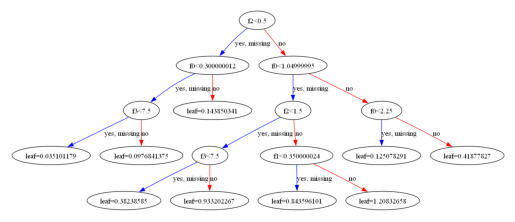

In [12]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

plot_tree(model,fmap='', num_trees=2, rankdir='UT', ax=None)

plt.savefig('./photo/XGBoost.png', dpi=300)
plt.show()

In [19]:
from sko.SA import SA

def obj_func(x):
    return -model.predict(x.reshape(1,6))[0]

constraint_ueq =[
    lambda x: 0 - x[0] * x[1],
    lambda x: x[0] + x[1] - 3
]
for i in range(10):
    print(i+1)
    sa = SA(func=obj_func, x0=[0,0,2,10,160,6], T_max=30, T_min=1e-9, L=300, max_stay_counter=150, lb=[0,0,0,0,100,2],ub=[3,3,10,20,200,12])
    best_x, best_y = sa.run()
    print("实验条件为：",best_x)
    print("预测产率为：",best_y)

1
实验条件为： [  0.67044836   0.51355209   6.01367123  13.36017335 195.72329101
   2.        ]
预测产率为： -22.219805
2
实验条件为： [  0.60060504   0.5111561    5.77270149  13.19965981 200.
   2.3535941 ]
预测产率为： -22.219805
3
实验条件为： [  0.57312744   0.51756731   6.44945071  12.62284804 199.70729081
   2.0417665 ]
预测产率为： -22.219805
4
实验条件为： [  0.65335392   0.5397308    6.04794731  12.97630453 194.41101155
   2.12807021]
预测产率为： -22.219805
5
实验条件为： [  0.65554773   0.51401419   6.05899208  12.7165076  199.99286333
   2.26854141]
预测产率为： -22.219805
6
实验条件为： [  0.60804509   0.53085757   6.12656213  13.29471739 200.
   2.        ]
预测产率为： -22.219805
7
实验条件为： [  0.62418328   0.51638659   6.18029565  13.22536779 199.94053448
   3.14783813]
预测产率为： -22.219805
8
实验条件为： [  0.58828209   0.54035311   6.40572989  13.1754456  200.
   2.        ]
预测产率为： -22.219805
9
实验条件为： [  0.55429154   0.53076335   6.12294782  13.37413192 197.2787472
   2.10299674]
预测产率为： -22.219805
10
实验条件为： [  0.56463231   0.50430573   5.69999998  13